# Predict survival on the Titanic

## Data and environment

Importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style("whitegrid", {'axes.grid' : False})

Importing data set

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survival: Survival (0 = No; 1 = Yes)

Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Name : Name

Sex : Sex

Age : Age

Sibsp : Number of Siblings/Spouses Aboard

Parch : Number of Parents/Children Aboard

Ticket : Ticket Number

Fare : Passenger Fare

Cabin : Cabin Number

Embarked : Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

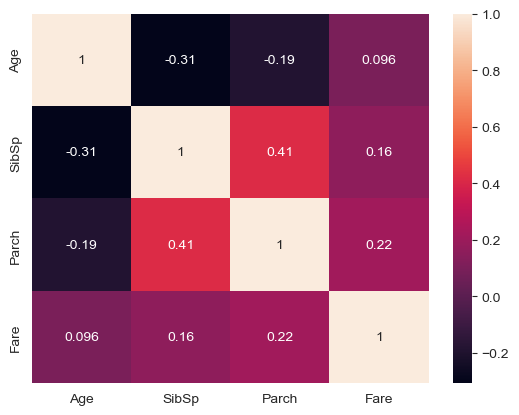

In [7]:
sns.heatmap(train_df[['Age','SibSp','Parch','Fare']].corr(), annot = True);

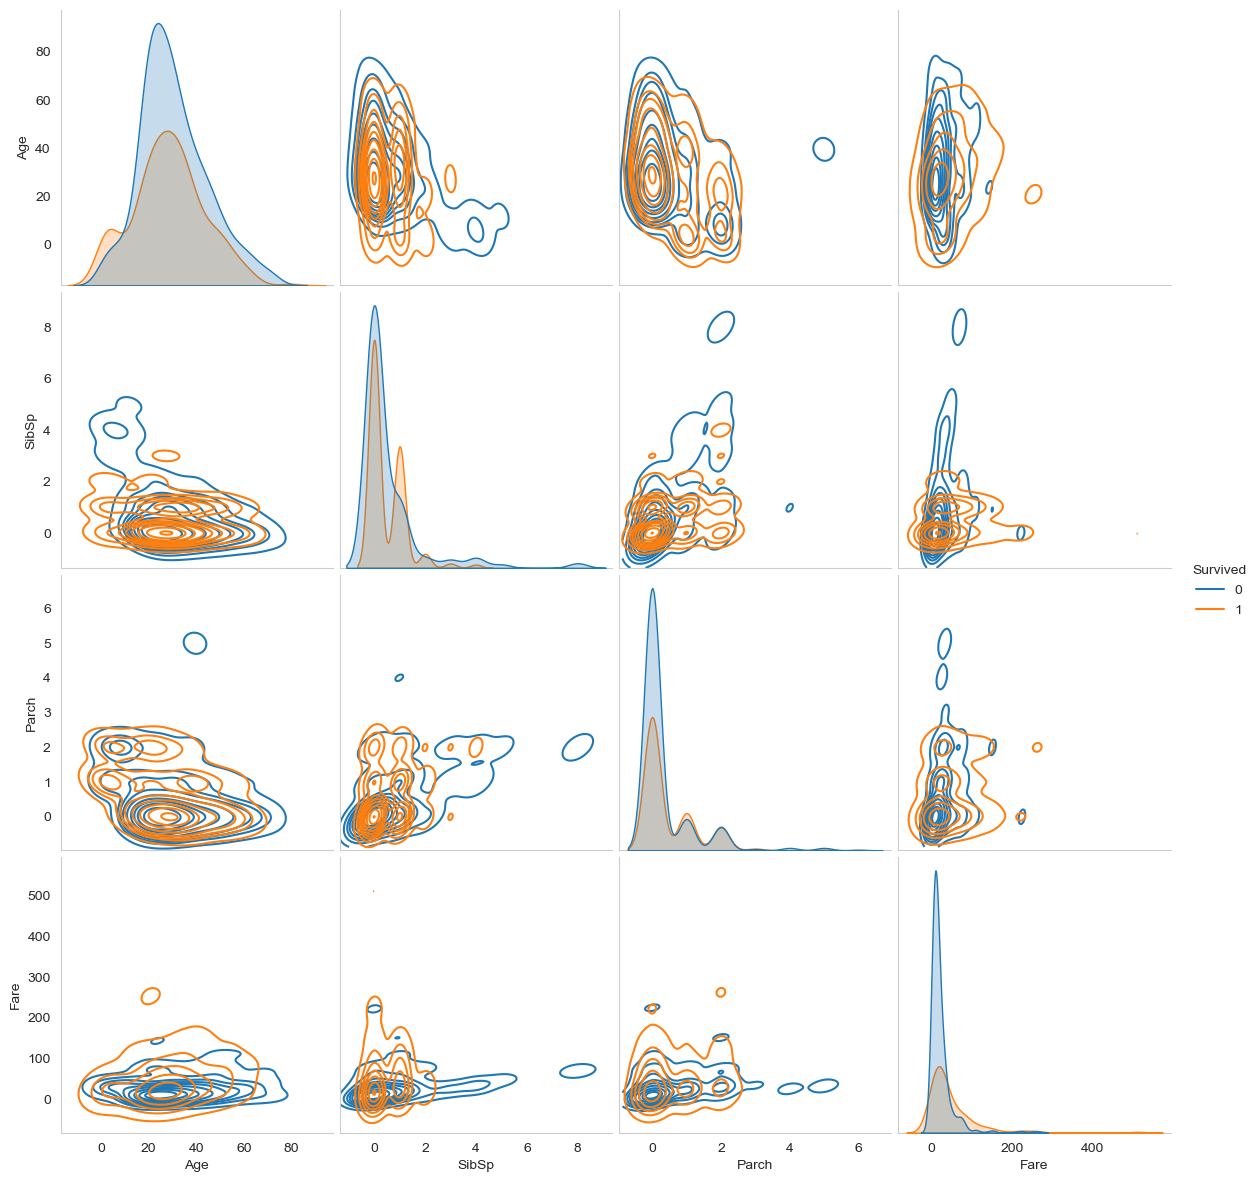

In [8]:
sns.pairplot(train_df,x_vars = ['Age','SibSp','Parch','Fare'], y_vars = ['Age','SibSp','Parch','Fare'],hue = 'Survived', 
             height = 3,kind = 'kde');

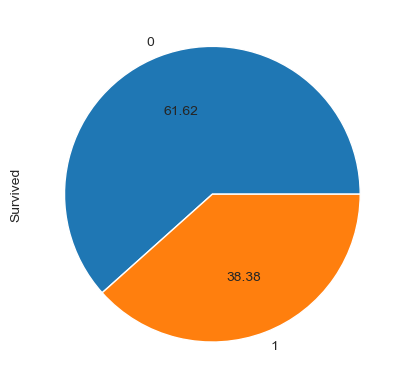

In [9]:
train_df['Survived'].value_counts().plot(kind='pie',autopct='%.2f');

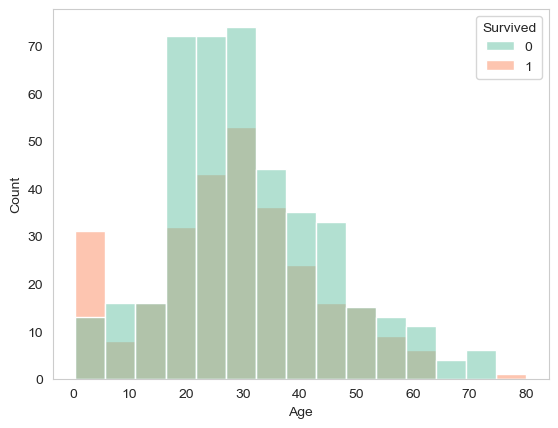

In [10]:
sns.histplot(data = train_df,x = 'Age',hue = 'Survived', bins = 15, palette = 'Set2');

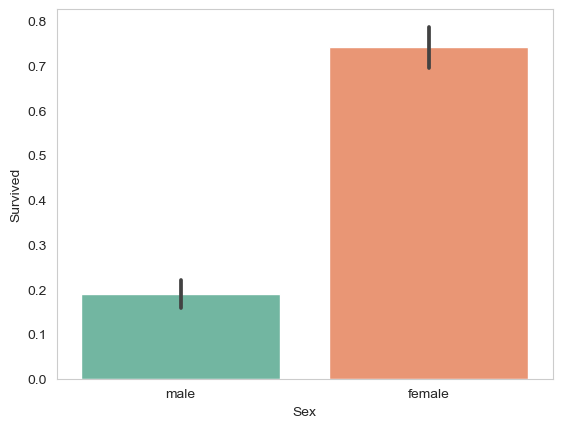

In [11]:
sns.barplot(data = train_df, x = 'Sex', y = 'Survived', palette = 'Set2');

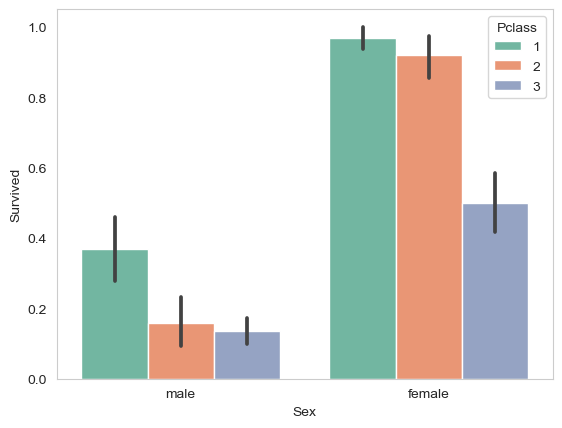

In [12]:
sns.barplot(data = train_df, x = "Sex", y = "Survived", hue = "Pclass", palette = 'Set2'); # 0 - male; 1 - female

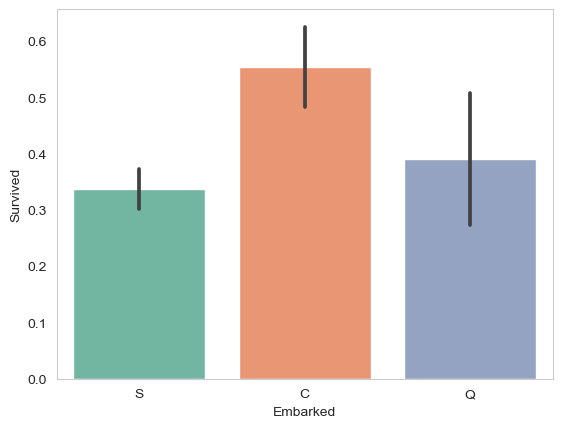

In [13]:
sns.barplot(data = train_df, x = "Embarked", y = "Survived", palette = 'Set2');

Data processing and handling of missing values

In [14]:
train_df.Age = train_df.Age.fillna(train_df.Age.median())
train_df.Embarked = train_df.Embarked.fillna(train_df.Embarked.dropna().mode()[0])

In [15]:
train_df.Sex = train_df.Sex.map({'male': 0,'female' : 1})
train_df.Embarked = train_df.Embarked.map({'S': 0,'C' : 1,'Q':2})

In [16]:
train_df = train_df.drop(['PassengerId','Name','Ticket', 'Cabin'], axis = 1)      

# Classification

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [18]:
X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']

In [19]:
standardScale = StandardScaler()
standardScale.fit_transform(X);

In [20]:
rand_val = random.randint(0,111)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_val)
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
725,3,0,20.0,0,0,8.6625,0
691,3,1,4.0,0,1,13.4167,1
393,1,1,23.0,1,0,113.2750,1
297,1,1,2.0,1,2,151.5500,0
602,1,0,28.0,0,0,42.4000,0


In [21]:
model_scores = []
def results():
    score = accuracy_score(y_test,y_pred)*100
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
    print("Accuracy : ",score)
    print("Report : \n",classification_report(y_test, y_pred))
    plt.title("Confusion matrix");
    return score

## KNeighborsClassifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier

Accuracy :  69.77611940298507
Report : 
               precision    recall  f1-score   support

           0       0.71      0.84      0.77       159
           1       0.68      0.50      0.57       109

    accuracy                           0.70       268
   macro avg       0.69      0.67      0.67       268
weighted avg       0.69      0.70      0.69       268



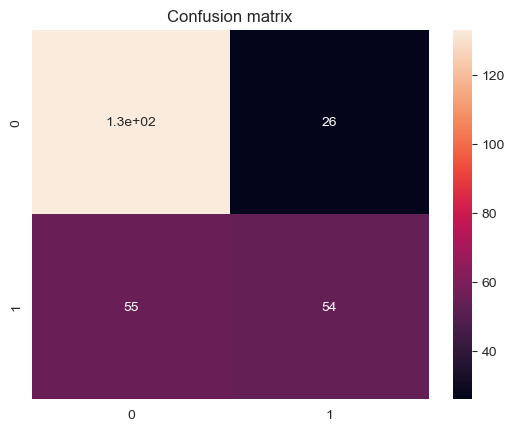

In [23]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

model_scores.append(("KNeighborsClassifier",results()))

In [24]:
knn_n = []
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    knn_n.append((i,accuracy_score(y_test,y_pred)*100))

In [25]:
knn_n = pd.DataFrame(knn_n, columns = ["N neighbors","Accuracy score"])
knn_n.head()

,N neighbors,Accuracy score
0,1,69.776119
1,2,64.925373
2,3,68.656716
3,4,70.149254
4,5,71.268657


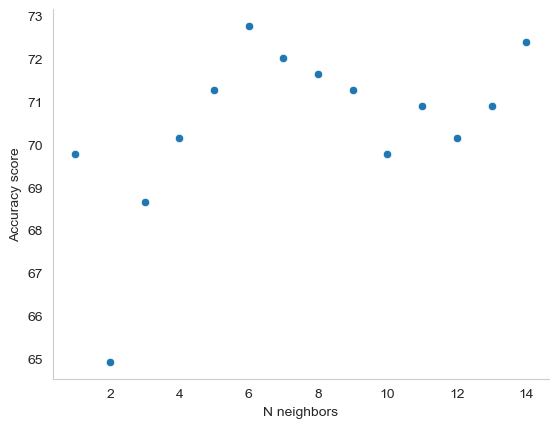

In [26]:
sns.scatterplot(data = knn_n, x = "N neighbors", y = "Accuracy score");
sns.despine()

##  RandomForestClassifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

Accuracy :  80.59701492537313
Report : 
               precision    recall  f1-score   support

           0       0.80      0.89      0.85       159
           1       0.81      0.68      0.74       109

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.79       268
weighted avg       0.81      0.81      0.80       268



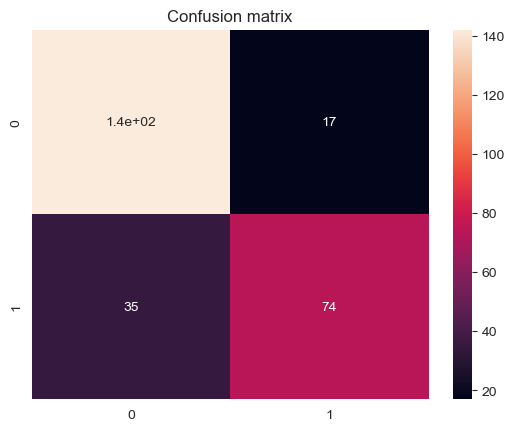

In [28]:
rfc = RandomForestClassifier(max_depth = 7)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

model_scores.append(("RandomForestClassifier",results()))

In [29]:
rfc_depth = []
for i in range(1,15):
    rfc = RandomForestClassifier(max_depth = i)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    rfc_depth.append((i,accuracy_score(y_test,y_pred)*100))

In [30]:
rfc_depth = pd.DataFrame(rfc_depth, columns = ["Max depth","Accuracy score"])
rfc_depth.head()

,Max depth,Accuracy score
0,1,70.522388
1,2,77.611940
2,3,77.611940
3,4,80.970149
4,5,80.597015


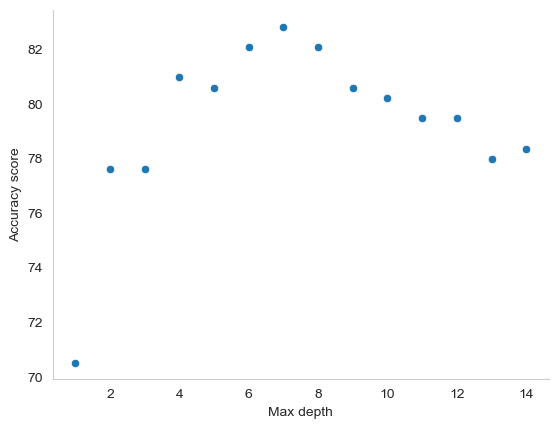

In [31]:
sns.scatterplot(data = rfc_depth, x = "Max depth", y = "Accuracy score");
sns.despine()

## DecisionTreeClassifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

Accuracy :  79.8507462686567
Report : 
               precision    recall  f1-score   support

           0       0.81      0.86      0.84       159
           1       0.78      0.71      0.74       109

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268



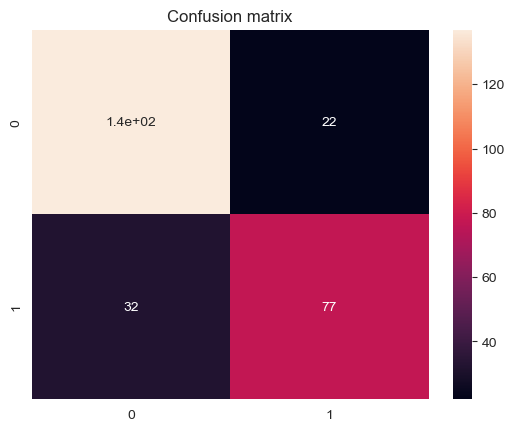

In [33]:
dtc = DecisionTreeClassifier(min_samples_leaf=5)
result = dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

model_scores.append(("DecisionTreeClassifier",results()))

In [34]:
dtc_leaf = []
for i in range(1,15):
    dtc = DecisionTreeClassifier(min_samples_leaf = i)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    dtc_leaf.append((i,accuracy_score(y_test,y_pred)*100))

In [35]:
dtc_leaf = pd.DataFrame(dtc_leaf, columns = ["Min samples leaf","Accuracy score"])
dtc_leaf.head()

,Min samples leaf,Accuracy score
0,1,74.626866
1,2,77.611940
2,3,79.104478
3,4,79.477612
4,5,79.850746


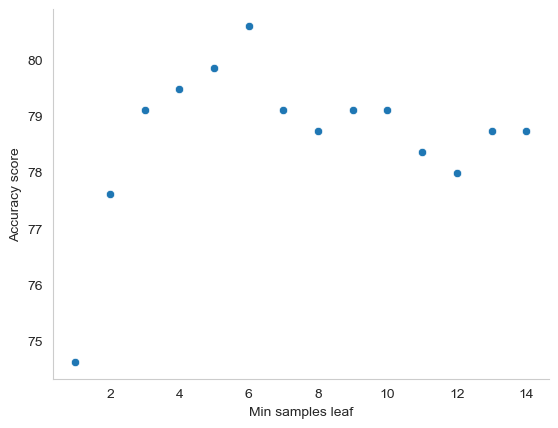

In [36]:
sns.scatterplot(data = dtc_leaf, x = "Min samples leaf", y = "Accuracy score");
sns.despine()

## GaussianNB

In [37]:
from sklearn.naive_bayes import GaussianNB

Accuracy :  77.23880597014924
Report : 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       159
           1       0.72      0.72      0.72       109

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



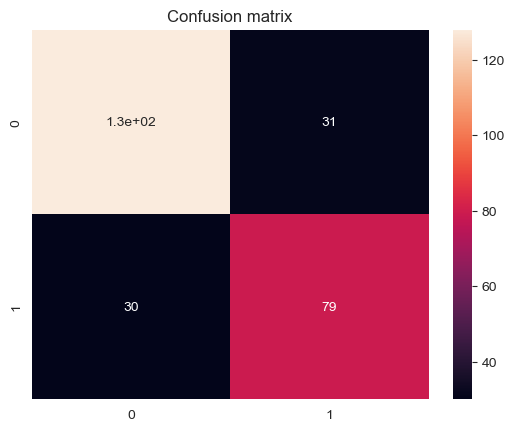

In [38]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

model_scores.append(("GaussianNB",results()))

In [39]:
model_scores = pd.DataFrame(model_scores, columns = ["Model","Accuracy score"])
model_scores

,Model,Accuracy score
0,KNeighborsClassifier,69.776119
1,RandomForestClassifier,80.597015
2,DecisionTreeClassifier,79.850746
3,GaussianNB,77.238806
